In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools 
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import datajoint as dj
from collections import defaultdict
import pycircstat as pycs
from funconnect import morphology, connectomics, ta3, nda
from tqdm import tqdm
import scipy.stats as stats


Connecting celiib@10.28.0.34:3306


In [17]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20


pinky = dj.create_virtual_module('pinky', 'microns_pinky')
ndap100 = dj.create_virtual_module('pinky_nda', 'microns_pinky_nda')
radtune = dj.create_virtual_module('pinky_radtune', 'microns_pinky_radtune')
spattune = dj.create_virtual_module('pinky_spattune', 'microns_pinky_spattune')
pinky_fc = dj.create_virtual_module('pinky_fc', 'microns_pinky_fc')

schema = dj.schema("microns_pinky_radtune")


In [7]:
radtune.BestVonFit.Unit() & pinky.Decimation35OrphanStitched() & 'von_p_value <= 0.002' & "confidence>0.5"

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346341352891,2488ca428583222f70981b01e4b84c81,0.0142162,=BLOB=,=BLOB=,=BLOB=,0.0625723,0.0540431,0.0618035,0.124022,0.001,0.9393616940050551
3,1,648518346341356241,66dc6420ca132a85ddda25939f084caa,0.00565237,=BLOB=,=BLOB=,=BLOB=,0.0202752,0.0178552,0.0200274,0.107137,0.001,0.957373658926309
3,1,648518346341356256,73dbecb8885beae030be3c263406f897,0.025249,=BLOB=,=BLOB=,=BLOB=,0.0679271,0.063242,0.0669904,0.0551834,0.001,1.7858262119801065
3,1,648518346341359123,8e54b140337daf69dfda4e9fbe14ae7f,0.0297197,=BLOB=,=BLOB=,=BLOB=,0.141441,0.122979,0.139556,0.117201,0.001,3.708831526488791
3,1,648518346341361981,f0c077c6b3ec8074c419a09fbb23388b,0.00287949,=BLOB=,=BLOB=,=BLOB=,0.0234285,0.0217913,0.0229093,0.0477177,0.001,1.4644267171718275
3,1,648518346341362771,a7d6d9bb9c79de84f8792c46b1516c16,0.047481,=BLOB=,=BLOB=,=BLOB=,0.681801,0.587579,0.668815,0.119148,0.001,0.6869009007690088
3,1,648518346341368192,0a0ee3399963886c58e9eaad755d146e,0.0163345,=BLOB=,=BLOB=,=BLOB=,0.160254,0.149098,0.157911,0.0549933,0.001,0.835527390590717
3,1,648518346341369370,8e4dd43ab0a7846e5013ecc6025e9acc,0.0193596,=BLOB=,=BLOB=,=BLOB=,0.234322,0.210452,0.230954,0.087497,0.001,0.5961253447331519
3,1,648518346341379312,8f3db7b9d61c1c8458fe115a339c7b86,0.000641483,=BLOB=,=BLOB=,=BLOB=,0.0427635,0.0370261,0.0422116,0.12126,0.001,0.5843029464358273
3,1,648518346341380003,19e96ac874b4a28742a27fe748a2eee5,0.0130354,=BLOB=,=BLOB=,=BLOB=,0.0147111,0.0132691,0.0145349,0.0860418,0.001,1.083702586790154


In [8]:
radtune.BestVonFit.Unit() & pinky.PymeshfixDecimatedExcitatoryStitchedMesh() & 'von_p_value <= 0.002' & "confidence>0.5"

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346349470171,104cb5878f833fe425a0ee7750d69024,0.0338352,=BLOB=,=BLOB=,=BLOB=,1.97013,1.4807,1.94225,0.234276,0.001,3.365524540011297
3,1,648518346349471565,ea7d60f34fe148d38a772c45ffd9d8d2,0.0,=BLOB=,=BLOB=,=BLOB=,13.4957,7.61779,13.3783,0.42684,0.001,3.1366678362873084
3,1,648518346349472574,121f62f7bfd521edb32dcd89bc0e696b,0.00707987,=BLOB=,=BLOB=,=BLOB=,0.0117504,0.0107282,0.0115648,0.0711946,0.001,1.26700343150085
3,1,648518346349473833,8bb981b069c568955229b118039acae2,0.0,=BLOB=,=BLOB=,=BLOB=,6.72941,3.24852,6.65339,0.505969,0.001,2.627829104732558
3,1,648518346349475536,4e1a88968fc9c4fd63b99635861b8291,0.0239916,=BLOB=,=BLOB=,=BLOB=,0.399129,0.344868,0.393501,0.121848,0.001,2.9011142670377916
3,1,648518346349475573,acc70407cc0825b60a383220645cfad3,0.0,=BLOB=,=BLOB=,=BLOB=,0.195326,0.179368,0.192504,0.0672496,0.001,1.4479411512793823
3,1,648518346349482312,179cf4d8a3038c2320b9e000437c78f3,0.0,=BLOB=,=BLOB=,=BLOB=,0.897127,0.813767,0.88305,0.0772273,0.001,2.512158028028598
3,1,648518346349483124,9916df1ccda2f731198b80dc2a43fb43,0.0849652,=BLOB=,=BLOB=,=BLOB=,8.49383,5.56615,8.38582,0.331967,0.001,3.4279893572594107
3,1,648518346349488659,f7978bf93ae7d47941bef9ca9d26145f,0.0160907,=BLOB=,=BLOB=,=BLOB=,0.0216602,0.0201383,0.0213385,0.055407,0.001,0.5864772576750952
3,1,648518346349491811,449763d90b8a0bb06dde845df8f35af3,0.0181213,=BLOB=,=BLOB=,=BLOB=,0.315991,0.240614,0.312157,0.226407,0.001,2.9586540477492376


In [10]:
@schema
class BestVonFit(dj.Computed):
    definition = """
    # Mean responses to radially coherent stimuli
    -> pinky.Segmentation
    -> VonBestFitMethod
    ---
    """

    class Unit(dj.Part):
        definition = """
        -> master
        -> pinky.Segment
        ---
        -> VonHash
        base                     : float                # von mises baseline amplitude
        thetas                   : blob                 # von mises gaussian peak angle (descending amp order)
        amps                     : blob                 # von mises gaussian amplitudes (descending amp order)
        sharps                   : blob                 # von mises gaussian sharpness (descending amp order)
        flat_pred                : float                # predictive performance of flat mean
        von_pred                 : float                # predictive performance of von fit on unshuffled data
        shuff_pred               : float                # predictive performance of von fit on shuffled data
        von_pred_adv             : float                # von mises predictive advantage over shuffled data
        von_p_value              : float                # fit component p_value by reshuffle
        confidence               : double               # confidence value that neuron is good match
        """

    @classmethod
    def get_sig_bestvon(cls, fdve_thresh=None, fve_thresh=None,
                        p_thresh=0.002, vonbestfit_method=1,
                        conf_thresh=1, exclude=True):

        von_rest = (f'vonbestfit_method = {vonbestfit_method} and confidence > {conf_thresh}')

        if fdve_thresh:
            von_rest = von_rest + f' and von_pred_adv > {fdve_thresh}'
        if fve_thresh:
            von_rest = von_rest + f' and von_pred > {fve_thresh}'
        if p_thresh:
            von_rest = von_rest + f' and von_p_value < {p_thresh}'
        sig_rel = ((cls.Unit & von_rest) & pinky.CurrentSegmentation)
        if exclude:
            sig_rel = sig_rel - pinky.SegmentExclude
        return sig_rel

# Jakes plots

In [ ]:
"""
What Jake wants: 
Added restrictions: For the excitatory neurons using: 
    Wanted to restrict by reasonable contact size
    Orientation tuning index (significantly tuned)
How to actually make plot
    Sort the neurons by preferred orientation, then do nxn connectivity for:
    Graph Number of times synapse onto each other
    Graph Synapse Density per pair (in the ContactCorrelation)

Do this for soma only
Do this for soma and Orphan

Pseudocode for Jakes plots:
1) Pull down all of the tuned segments
    Soma only
    Orphan and Soma
2) Check that both groups have enough contact (AND restrict by contact size)
3) Find the following for each of the pairs:
- Number of direct connections
- Number of shared segments
- synapse density

4) Put each into a pandas pivot table
5) Plot them using a heat map

"""

In [14]:
tuned_segments = BestVonFit.get_sig_bestvon(conf_thresh=0.5)
tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346341356241,66dc6420ca132a85ddda25939f084caa,0.00565237,=BLOB=,=BLOB=,=BLOB=,0.0202752,0.0178552,0.0200274,0.107137,0.001,0.957373658926309
3,1,648518346341356256,73dbecb8885beae030be3c263406f897,0.025249,=BLOB=,=BLOB=,=BLOB=,0.0679271,0.063242,0.0669904,0.0551834,0.001,1.7858262119801065
3,1,648518346341359123,8e54b140337daf69dfda4e9fbe14ae7f,0.0297197,=BLOB=,=BLOB=,=BLOB=,0.141441,0.122979,0.139556,0.117201,0.001,3.708831526488791
3,1,648518346341361981,f0c077c6b3ec8074c419a09fbb23388b,0.00287949,=BLOB=,=BLOB=,=BLOB=,0.0234285,0.0217913,0.0229093,0.0477177,0.001,1.4644267171718275
3,1,648518346341362771,a7d6d9bb9c79de84f8792c46b1516c16,0.047481,=BLOB=,=BLOB=,=BLOB=,0.681801,0.587579,0.668815,0.119148,0.001,0.6869009007690088
3,1,648518346341369370,8e4dd43ab0a7846e5013ecc6025e9acc,0.0193596,=BLOB=,=BLOB=,=BLOB=,0.234322,0.210452,0.230954,0.087497,0.001,0.5961253447331519
3,1,648518346341379312,8f3db7b9d61c1c8458fe115a339c7b86,0.000641483,=BLOB=,=BLOB=,=BLOB=,0.0427635,0.0370261,0.0422116,0.12126,0.001,0.5843029464358273
3,1,648518346341380208,74e215bae05c675a123732aa45a53b69,0.00306518,=BLOB=,=BLOB=,=BLOB=,0.0916323,0.0823298,0.0903508,0.0875341,0.001,0.5335169346113676
3,1,648518346341385331,96d93eb2895fe58e287a514e0f83940d,0.00550576,=BLOB=,=BLOB=,=BLOB=,0.10177,0.0808544,0.100497,0.193006,0.001,0.6286509538088302
3,1,648518346341389643,b09b0148ef83ed2d83aa1983c6c919bb,0.00926537,=BLOB=,=BLOB=,=BLOB=,0.046643,0.0414749,0.0460076,0.0971797,0.001,1.3243637575452651


In [15]:
soma = (pinky.AllenSoma - pinky.SegmentExclude) & pinky.CurrentSegmentation
soma = soma & "cell_class='excitatory'"

soma_tuned_segments = BestVonFit.get_sig_bestvon(conf_thresh=0.5) & soma
soma_tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346349470171,104cb5878f833fe425a0ee7750d69024,0.0338352,=BLOB=,=BLOB=,=BLOB=,1.97013,1.4807,1.94225,0.234276,0.001,3.365524540011297
3,1,648518346349471565,ea7d60f34fe148d38a772c45ffd9d8d2,0.0,=BLOB=,=BLOB=,=BLOB=,13.4957,7.61779,13.3783,0.42684,0.001,3.1366678362873084
3,1,648518346349472574,121f62f7bfd521edb32dcd89bc0e696b,0.00707987,=BLOB=,=BLOB=,=BLOB=,0.0117504,0.0107282,0.0115648,0.0711946,0.001,1.26700343150085
3,1,648518346349473833,8bb981b069c568955229b118039acae2,0.0,=BLOB=,=BLOB=,=BLOB=,6.72941,3.24852,6.65339,0.505969,0.001,2.627829104732558
3,1,648518346349475536,4e1a88968fc9c4fd63b99635861b8291,0.0239916,=BLOB=,=BLOB=,=BLOB=,0.399129,0.344868,0.393501,0.121848,0.001,2.9011142670377916
3,1,648518346349475573,acc70407cc0825b60a383220645cfad3,0.0,=BLOB=,=BLOB=,=BLOB=,0.195326,0.179368,0.192504,0.0672496,0.001,1.4479411512793823
3,1,648518346349482312,179cf4d8a3038c2320b9e000437c78f3,0.0,=BLOB=,=BLOB=,=BLOB=,0.897127,0.813767,0.88305,0.0772273,0.001,2.512158028028598
3,1,648518346349483124,9916df1ccda2f731198b80dc2a43fb43,0.0849652,=BLOB=,=BLOB=,=BLOB=,8.49383,5.56615,8.38582,0.331967,0.001,3.4279893572594107
3,1,648518346349488659,f7978bf93ae7d47941bef9ca9d26145f,0.0160907,=BLOB=,=BLOB=,=BLOB=,0.0216602,0.0201383,0.0213385,0.055407,0.001,0.5864772576750952
3,1,648518346349491811,449763d90b8a0bb06dde845df8f35af3,0.0181213,=BLOB=,=BLOB=,=BLOB=,0.315991,0.240614,0.312157,0.226407,0.001,2.9586540477492376


# Soma portion of the graphs

In [18]:
# check that the contact length is enough
soma_postsyn_contacts = pinky_fc.PostsynContact() & soma_tuned_segments
soma_postsyn_contacts

segmentation segmentation id,segment_id segment id unique within each Segmentation,total_n_contacts total number of contacts,total_postsyn_length total total postsynaptic contact length,total_contact_conversion total synapse to contact ratio,total_contact_density total synapse to contact length ratio,total_n_synapses total total number of synapses for neurite,total_synapse_sizes_mean total average synaptic size,apical_n_contacts apical number of contacts,apical_n_contacts_prop apical proportion of number of contacts,apical_postsyn_length apical total postsynaptic contact length,apical_postsyn_length_prop apical total postsynaptic contact length,apical_contact_conversion apical synapse to contact ratio,apical_contact_density apical synapse to contact length ratio,apical_n_synapses apical total number of synapses for neurite,apical_synapse_sizes_mean apical average synaptic size,basal_n_contacts basal number of contacts,basal_n_contacts_prop basal proportion of number of contacts,basal_postsyn_length basal total postsynaptic contact length,basal_postsyn_length_prop basal total postsynaptic contact length,basal_contact_conversion basal synapse to contact ratio,basal_contact_density basal synapse to contact length ratio,basal_n_synapses basal total number of synapses for neurite,basal_synapse_sizes_mean basal average synaptic size,oblique_n_contacts oblique number of contacts,oblique_n_contacts_prop oblique proportion of number of contacts,oblique_postsyn_length oblique total postsynaptic contact length,oblique_postsyn_length_prop oblique total postsynaptic contact length,oblique_contact_conversion oblique synapse to contact ratio,oblique_contact_density oblique synapse to contact length ratio,oblique_n_synapses oblique total number of synapses for neurite,oblique_synapse_sizes_mean oblique average synaptic size,soma_n_contacts soma number of contacts,soma_n_contacts_prop soma proportion of number of contacts,soma_postsyn_length soma total postsynaptic contact length,soma_postsyn_length_prop soma total postsynaptic contact length,soma_contact_conversion soma synapse to contact ratio,soma_contact_density soma synapse to contact length ratio,soma_n_synapses soma total number of synapses for neurite,soma_synapse_sizes_mean soma average synaptic size,axon_n_contacts axon number of contacts,axon_n_contacts_prop axon proportion of number of contacts,axon_postsyn_length axon total postsynaptic contact length,axon_postsyn_length_prop axon total postsynaptic contact length,axon_contact_conversion axon synapse to contact ratio,axon_contact_density axon synapse to contact length ratio,axon_n_synapses axon total number of synapses for neurite,axon_synapse_sizes_mean axon average synaptic size,dendrites_n_contacts dendrites number of contacts,dendrites_n_contacts_prop dendrites proportion of number of contacts,dendrites_postsyn_length dendrites total postsynaptic contact length,dendrites_postsyn_length_prop dendrites total postsynaptic contact length,dendrites_contact_conversion dendrites synapse to contact ratio,dendrites_contact_density dendrites synapse to contact length ratio,dendrites_n_synapses dendrites total number of synapses for neurite,dendrites_synapse_sizes_mean dendrites average synaptic size
3,648518346349470171,18872,135000351,0.0386816,5.40739e-06,730,397.6,135,0.00715345,924488,0.00684804,0.0888889,1.29802e-05,12,309.583,8686,0.460259,59981980,0.44431,0.0757541,1.097e-05,658,390.471,36,0.00190759,191370,0.00141755,0.0277778,5.22547e-06,1,718.0,363,0.0192348,1195197,0.00885329,0.110193,3.34673e-05,40,553.775,9652,0.511446,72707316,0.538571,0.0019685,2.61322e-07,19,354.421,0,0.0,0,0.0,nan,nan,0,0.0
3,648518346349471565,35905,249633669,0.0508286,7.31071e-06,1825,440.693,4512,0.125665,32197150,0.128978,0.0687057,9.62818e-06,310,447.155,21722,0.604985,151102420,0.605297,0.0662922,9.52996e-06,1440,436.563,0,0.0,0,0.0,nan,nan,0,0.0,524,0.0145941,1661759,0.00665679,0.0954198,3.00886e-05,50,527.82,9147,0.254756,64672339,0.259069,0.002

In [19]:
total_postsyn_length = soma_postsyn_contacts.fetch("total_postsyn_length")
np.min(total_postsyn_length)

833033

In [ ]:
"""
3) Find the following for each of the pairs:
- Number of direct connections
- Number of shared segments
- synapse density
"""

# n_direct_connections per pair

In [22]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

42

In [21]:

"""
Gets the combination and their unidirection number of synapses between them
"""

# number of direct connections (synapses) for each functional soma pair (both presyn and postsyn are somas with functional traces)
soma = soma_postsyn_contacts
synapse = (pinky.Synapse - pinky.SynapseExclude) & pinky.CurrentSegmentation
segment = (pinky.Segment - pinky.SegmentExclude) & pinky.CurrentSegmentation
#gets all of the synapses where the presyn and postsyn are both soma cells
fun_fun_syn = synapse & soma.proj(presyn = 'segment_id') & soma.proj(postsyn = 'segment_id') 
#adds up the number of synapses for each soma-soma combination (some wont have a combination because not have synapse between them)
n_syn = dj.U('presyn', 'postsyn').aggr(fun_fun_syn, n_syn = 'count(*)') # soma-soma pairs with at least one synapse
soma_no_id = dj.U("segmentation","segment_id") & soma
#gets all the possible combinations of soma to soma where they aren't the same segment
all_fun_fun = soma_no_id.proj(presyn = 'segment_id') * soma_no_id.proj(postsyn = 'segment_id') & 'presyn != postsyn'
#makes a generic table for all soma combinations that assymes no synapses between them
rel = (dj.U('presyn', 'postsyn') & all_fun_fun).proj('presyn', 'postsyn', n_syn='0')
#combines the base generic 0 synapse table with the one with actual values
#rel is the base table and they are adding the synapse table to it
total_n_syn = rel.aggr(dj.U('n_add') * n_syn.proj(n_add='n_syn'), n_syn_total='n_syn + ifnull(n_add, 0)', keep_all_rows=True)# fill out all zeros

"""
if made n x n combination box with presyns on x and postsyns on y 
a (where presyn < postsyn) is the top right traingle
b (presyn > postsyn) is bottom right triangle

We want every combination of A --> B added together
A (presyn) to B (postsyn) + B (presyn) to A (postsyn)
"""

#combine a-b and b-a connections into one number, and segment_id1 < segment_id2
attrs = ['presyn', 'postsyn', 'n_syn_total']
a = (total_n_syn & 'presyn < postsyn').proj('presyn', 'postsyn', n_syn1 = 'n_syn_total')
b = (total_n_syn & 'presyn > postsyn').proj(n_syn2 = 'n_syn_total', postsyn = 'presyn', presyn = 'postsyn')

"""adds up the non-directional number of synapses for A --> B and B --> A
## *** can use projections to rename primary keys ***
Uses table a as the base table so that is where presyn is less than the postsyn

"""

undirected_n_syn = (a * b).proj(n_syn_total = 'n_syn1 + n_syn2', segment_id1 = 'presyn', segment_id2 = 'postsyn')
undirected_n_syn




segment_id1 segment id unique within each Segmentation,segment_id2 segment id unique within each Segmentation,n_syn_total calculated attribute
648518346349470171,648518346349471565,0
648518346349470171,648518346349472574,0
648518346349470171,648518346349473833,0
648518346349470171,648518346349475536,0
648518346349470171,648518346349475573,0
648518346349470171,648518346349482312,0
648518346349470171,648518346349483124,0
648518346349470171,648518346349488659,0
648518346349470171,648518346349491811,0
648518346349470171,648518346349491953,0


In [30]:
((42*42)-42)/2

861.0

In [25]:
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, n_direct_syn = undirected_n_syn.fetch("segment_id1","segment_id2","n_syn_total")

In [27]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [37]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

In [44]:
orientation_seg_2_rearranged.dtype

dtype('float64')

In [47]:
n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

In [48]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_direct_syn = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    n_direct_syn=n_direct_syn,
                   )

df_direct_syn = pd.DataFrame.from_dict(data_direct_syn)
df_direct_syn = df_direct_syn.pivot("segment_1_orientation","segment_2_orientation","n_direct_syn") 
df_direct_syn


segment_2_orientation,1.302145,1.474103,1.663518,4.348466,6.079962,6.653894,20.845788,37.915539,49.518001,67.500131,...,165.805879,170.855629,170.985321,171.562794,173.665251,173.947913,175.037919,175.767655,176.402842,177.099136
segment_1_orientation,,,,,,,,,,,,,,,,,,,,,
1.474103,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.663518,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.348466,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.079962,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.653894,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20.845788,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37.915539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49.518001,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67.500131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


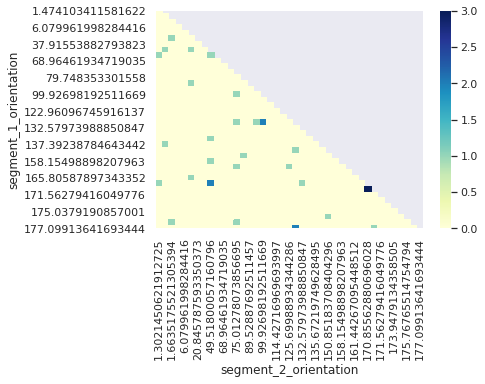

In [49]:
# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_direct_syn, cmap="YlGnBu")

In [ ]:
"""
Things to change: 
1) Round axis
2) Do underlying distribution and bin

"""

# n_shared_segment

In [50]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

42

In [54]:
soma_tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346349470171,104cb5878f833fe425a0ee7750d69024,0.0338352,=BLOB=,=BLOB=,=BLOB=,1.97013,1.4807,1.94225,0.234276,0.001,3.365524540011297
3,1,648518346349471565,ea7d60f34fe148d38a772c45ffd9d8d2,0.0,=BLOB=,=BLOB=,=BLOB=,13.4957,7.61779,13.3783,0.42684,0.001,3.1366678362873084
3,1,648518346349472574,121f62f7bfd521edb32dcd89bc0e696b,0.00707987,=BLOB=,=BLOB=,=BLOB=,0.0117504,0.0107282,0.0115648,0.0711946,0.001,1.26700343150085
3,1,648518346349473833,8bb981b069c568955229b118039acae2,0.0,=BLOB=,=BLOB=,=BLOB=,6.72941,3.24852,6.65339,0.505969,0.001,2.627829104732558
3,1,648518346349475536,4e1a88968fc9c4fd63b99635861b8291,0.0239916,=BLOB=,=BLOB=,=BLOB=,0.399129,0.344868,0.393501,0.121848,0.001,2.9011142670377916
3,1,648518346349475573,acc70407cc0825b60a383220645cfad3,0.0,=BLOB=,=BLOB=,=BLOB=,0.195326,0.179368,0.192504,0.0672496,0.001,1.4479411512793823
3,1,648518346349482312,179cf4d8a3038c2320b9e000437c78f3,0.0,=BLOB=,=BLOB=,=BLOB=,0.897127,0.813767,0.88305,0.0772273,0.001,2.512158028028598
3,1,648518346349483124,9916df1ccda2f731198b80dc2a43fb43,0.0849652,=BLOB=,=BLOB=,=BLOB=,8.49383,5.56615,8.38582,0.331967,0.001,3.4279893572594107
3,1,648518346349488659,f7978bf93ae7d47941bef9ca9d26145f,0.0160907,=BLOB=,=BLOB=,=BLOB=,0.0216602,0.0201383,0.0213385,0.055407,0.001,0.5864772576750952
3,1,648518346349491811,449763d90b8a0bb06dde845df8f35af3,0.0181213,=BLOB=,=BLOB=,=BLOB=,0.315991,0.240614,0.312157,0.226407,0.001,2.9586540477492376


In [56]:
n_seg_shared = pinky_fc.SharedInput() & soma_tuned_segments & soma_tuned_segments.proj(segment_b="segment_id")
n_seg_shared

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b segment id unique within each Segmentation,n_syn_a number of synapses for cell A,n_syn_b number of synapses for cell B,n_syn_union number of unique synapses for both,n_syn_shared number of shared synapses,n_seg_a number of segments for cell A,n_seg_b number of segments for cell B,n_seg_union number of unique segments for both,n_seg_shared number of shared segments
3,648518346349470171,648518346349471565,742,1873,2586,29,633,1625,2238,20
3,648518346349470171,648518346349472574,742,1362,2019,85,633,1194,1774,53
3,648518346349471565,648518346349472574,1873,1362,3172,63,1625,1194,2766,53
3,648518346349470171,648518346349473833,742,396,1125,13,633,365,988,10
3,648518346349471565,648518346349473833,1873,396,2257,12,1625,365,1980,10
3,648518346349472574,648518346349473833,1362,396,1732,26,1194,365,1537,22
3,648518346349470171,648518346349475536,742,1176,1884,34,633,1035,1642,26
3,648518346349471565,648518346349475536,1873,1176,3000,49,1625,1035,2618,42
3,648518346349472574,648518346349475536,1362,1176,2417,121,1194,1035,2154,75
3,648518346349473833,648518346349475536,396,1176,1562,10,365,1035,1393,7


In [57]:
#get the number of shared segments
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, n_shared_segments = n_seg_shared.fetch("segment_id","segment_b","n_seg_shared")

In [58]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [59]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

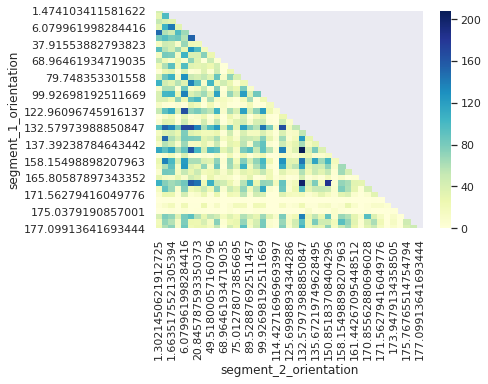

In [61]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_shared_segments = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    n_shared_segments=n_shared_segments,
                   )

df_shared_segments = pd.DataFrame.from_dict(data_shared_segments)
df_shared_segments = df_shared_segments.pivot("segment_1_orientation","segment_2_orientation","n_shared_segments") 
df_shared_segments

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_shared_segments, cmap="YlGnBu")


# Shared Input

In [ ]:
"""
Changes:
1) Bin but have 2 graphs:
1 with the average and 1 with the number of data points per bin

"""

# synapse density

In [63]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

42

In [54]:
soma_tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346349470171,104cb5878f833fe425a0ee7750d69024,0.0338352,=BLOB=,=BLOB=,=BLOB=,1.97013,1.4807,1.94225,0.234276,0.001,3.365524540011297
3,1,648518346349471565,ea7d60f34fe148d38a772c45ffd9d8d2,0.0,=BLOB=,=BLOB=,=BLOB=,13.4957,7.61779,13.3783,0.42684,0.001,3.1366678362873084
3,1,648518346349472574,121f62f7bfd521edb32dcd89bc0e696b,0.00707987,=BLOB=,=BLOB=,=BLOB=,0.0117504,0.0107282,0.0115648,0.0711946,0.001,1.26700343150085
3,1,648518346349473833,8bb981b069c568955229b118039acae2,0.0,=BLOB=,=BLOB=,=BLOB=,6.72941,3.24852,6.65339,0.505969,0.001,2.627829104732558
3,1,648518346349475536,4e1a88968fc9c4fd63b99635861b8291,0.0239916,=BLOB=,=BLOB=,=BLOB=,0.399129,0.344868,0.393501,0.121848,0.001,2.9011142670377916
3,1,648518346349475573,acc70407cc0825b60a383220645cfad3,0.0,=BLOB=,=BLOB=,=BLOB=,0.195326,0.179368,0.192504,0.0672496,0.001,1.4479411512793823
3,1,648518346349482312,179cf4d8a3038c2320b9e000437c78f3,0.0,=BLOB=,=BLOB=,=BLOB=,0.897127,0.813767,0.88305,0.0772273,0.001,2.512158028028598
3,1,648518346349483124,9916df1ccda2f731198b80dc2a43fb43,0.0849652,=BLOB=,=BLOB=,=BLOB=,8.49383,5.56615,8.38582,0.331967,0.001,3.4279893572594107
3,1,648518346349488659,f7978bf93ae7d47941bef9ca9d26145f,0.0160907,=BLOB=,=BLOB=,=BLOB=,0.0216602,0.0201383,0.0213385,0.055407,0.001,0.5864772576750952
3,1,648518346349491811,449763d90b8a0bb06dde845df8f35af3,0.0181213,=BLOB=,=BLOB=,=BLOB=,0.315991,0.240614,0.312157,0.226407,0.001,2.9586540477492376


In [64]:
pinky_fc.ContactCorrelation()

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b id of the postsynaptic neuron,n_seg_a n_presyns contacting onto segment_id,n_seg_b n_presyns contacting onto segment_b,n_seg_shared n_presyns contacting onto both segment_id and segment_b,n_seg_union n_presyns contacting either segment_id or segment_b,n_seg_shared_converted n_presyns contacting onto both and converting on at least 1 postsyn,n_seg_a_converted n_presyns contacting onto both and converting on postsyna a,n_seg_a_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna a,n_seg_b_converted n_presyns contacting onto both and converting on postsyna b,n_seg_b_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna b,binary_conversion_pearson pearson correlation for binary n_synapse/n_contact rate,binary_conversion_cosine cosine similarity correlation for binary n_synapse/n_contact rate,binary_conv_jaccard_ones_ratio a / (a + b + c + d) for jaccard similarity of binary conversion rate,binary_conv_jaccard_matching_ratio ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate,conversion_pearson Pearson correlation for n_synapse/n_contact rate,conversion_cosine cosine similarity for n_synapse/n_contact rate,density_pearson Pearson correlation for n_synapse/postsyn_length rate,density_cosine cosine similarity for n_synapse/postsyn_length rate,synapse_volume_mean_pearson Pearson correlation for mean of synaptic volume,synapse_volume_mean_cosine cosine similarity for mean of synaptic volume,synapse_vol_density_pearson Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate,synapse_vol_density_cosine cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate,binary_conversion_pearson_converted pearson correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conversion_cosine_converted cosine similarity correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conv_jaccard_ones_ratio_converted a / (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,binary_conv_jaccard_matching_ratio_converted ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,conversion_pearson_converted Pearson correlation for n_synapse/n_contact rate for axon group with at least 1 conversion,conversion_cosine_converted cosine similarity for n_synapse/n_contact rate for axon group with at least 1 conversion,density_pearson_converted Pearson correlation for n_synapse/postsyn_length rate for axon group with at least 1 conversion,density_cosine_converted cosine similarity for n_synapse/postsyn_length rate for axon group with at least 1 conversion,synapse_volume_mean_pearson_converted Pearson correlation for mean of synaptic volume for axon group with at least 1 conversion,synapse_volume_mean_cosine_converted cosine similarity for mean of synaptic volume for axon group with at least 1 conversion,synapse_vol_density_pearson_converted Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion,synapse_vol_density_cosine_converted cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion
3,648518346341353058,648518346341353574,1387,197,0,1584,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341353607,1387,1123,27,2483,0,0,nan,0,nan,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341353788,1387,5,0,1392,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341354313,1387,42,0,1429,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,n

In [65]:
binary_conversion_pearson = pinky_fc.ContactCorrelation() & soma_tuned_segments & soma_tuned_segments.proj(segment_b="segment_id")
binary_conversion_pearson_table = binary_conversion_pearson

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b id of the postsynaptic neuron,n_seg_a n_presyns contacting onto segment_id,n_seg_b n_presyns contacting onto segment_b,n_seg_shared n_presyns contacting onto both segment_id and segment_b,n_seg_union n_presyns contacting either segment_id or segment_b,n_seg_shared_converted n_presyns contacting onto both and converting on at least 1 postsyn,n_seg_a_converted n_presyns contacting onto both and converting on postsyna a,n_seg_a_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna a,n_seg_b_converted n_presyns contacting onto both and converting on postsyna b,n_seg_b_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna b,binary_conversion_pearson pearson correlation for binary n_synapse/n_contact rate,binary_conversion_cosine cosine similarity correlation for binary n_synapse/n_contact rate,binary_conv_jaccard_ones_ratio a / (a + b + c + d) for jaccard similarity of binary conversion rate,binary_conv_jaccard_matching_ratio ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate,conversion_pearson Pearson correlation for n_synapse/n_contact rate,conversion_cosine cosine similarity for n_synapse/n_contact rate,density_pearson Pearson correlation for n_synapse/postsyn_length rate,density_cosine cosine similarity for n_synapse/postsyn_length rate,synapse_volume_mean_pearson Pearson correlation for mean of synaptic volume,synapse_volume_mean_cosine cosine similarity for mean of synaptic volume,synapse_vol_density_pearson Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate,synapse_vol_density_cosine cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate,binary_conversion_pearson_converted pearson correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conversion_cosine_converted cosine similarity correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conv_jaccard_ones_ratio_converted a / (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,binary_conv_jaccard_matching_ratio_converted ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,conversion_pearson_converted Pearson correlation for n_synapse/n_contact rate for axon group with at least 1 conversion,conversion_cosine_converted cosine similarity for n_synapse/n_contact rate for axon group with at least 1 conversion,density_pearson_converted Pearson correlation for n_synapse/postsyn_length rate for axon group with at least 1 conversion,density_cosine_converted cosine similarity for n_synapse/postsyn_length rate for axon group with at least 1 conversion,synapse_volume_mean_pearson_converted Pearson correlation for mean of synaptic volume for axon group with at least 1 conversion,synapse_volume_mean_cosine_converted cosine similarity for mean of synaptic volume for axon group with at least 1 conversion,synapse_vol_density_pearson_converted Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion,synapse_vol_density_cosine_converted cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion
3,648518346349470171,648518346349471565,9756,17911,4316,23351,478,255,0.533473,243,0.508368,0.024057,0.0803446,0.00463392,0.893883,0.0373769,0.0815687,0.0579348,0.091224,-1.0,0.0484942,0.046682,0.063809,-0.91963,0.0803446,0.041841,0.041841,-0.496292,0.0949068,-0.334623,0.091224,-1.0,0.0484942,-0.117609,0.063809
3,648518346349470171,648518346349472574,9756,11024,6244,14536,1051,418,0.397716,682,0.648906,0.00686988,0.0917732,0.00784753,0.839526,0.0212911,0.087461,0.0750202,0.0879319,-1.0,0.0439539,0.072283,0.0882345,-0.90518,0.0917732,0.0466223,0.0466223,-0.47311,0.0942911,0.00421315,0.0

In [67]:
#get the number of shared segments
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, binary_conversion_pearson,conversion_pearson,density_pearson,synapse_vol_density_pearson = binary_conversion_pearson_table.fetch("segment_id",
                                                                                "segment_b",
                                                                                "binary_conversion_pearson",
                                                                                "conversion_pearson",
                                                                                "density_pearson",
                                                                                "synapse_vol_density_pearson"
                                                                               )

In [70]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [71]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

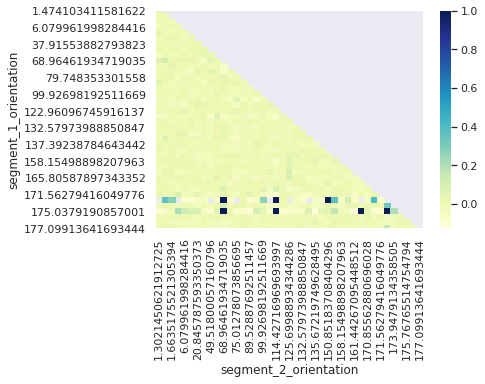

In [72]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_binary_conversion_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    binary_conversion_pearson=binary_conversion_pearson,
                   )

df_binary_conversion_pearson = pd.DataFrame.from_dict(data_binary_conversion_pearson)
df_binary_conversion_pearson = df_binary_conversion_pearson.pivot("segment_1_orientation","segment_2_orientation","binary_conversion_pearson") 
df_binary_conversion_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_binary_conversion_pearson, cmap="YlGnBu")


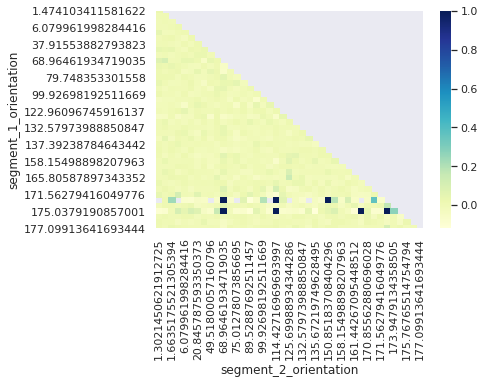

In [74]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_conversion_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    conversion_pearson=conversion_pearson,
                   )

df_data_conversion_pearson = pd.DataFrame.from_dict(data_conversion_pearson)
df_data_conversion_pearson = df_data_conversion_pearson.pivot("segment_1_orientation","segment_2_orientation","conversion_pearson") 
df_data_conversion_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_data_conversion_pearson, cmap="YlGnBu")


In [ ]:
"""
Restrict to only pairs that have significant number of shared inputs/contact
"""

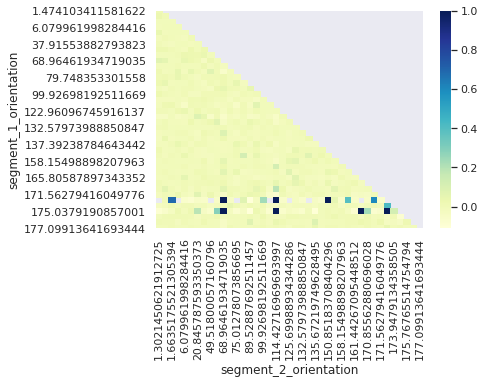

In [75]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_density_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    density_pearson=density_pearson,
                   )

df_density_pearson = pd.DataFrame.from_dict(data_density_pearson)
df_density_pearson = df_density_pearson.pivot("segment_1_orientation","segment_2_orientation","density_pearson") 
df_density_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_density_pearson, cmap="YlGnBu")


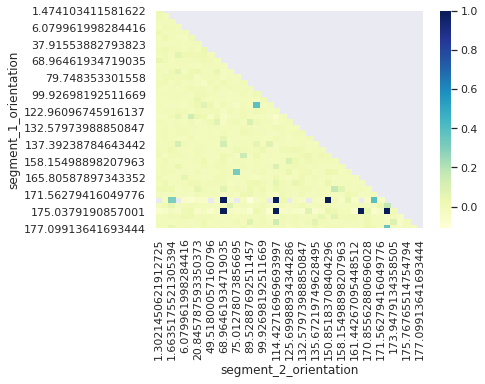

In [76]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_synapse_vol_density_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    synapse_vol_density_pearson=synapse_vol_density_pearson,
                   )

df_synapse_vol_density_pearson = pd.DataFrame.from_dict(data_synapse_vol_density_pearson)
df_synapse_vol_density_pearson = df_synapse_vol_density_pearson.pivot("segment_1_orientation","segment_2_orientation","synapse_vol_density_pearson") 
df_synapse_vol_density_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_synapse_vol_density_pearson, cmap="YlGnBu")


In [ ]:
"""
Restrict to only pairs that have significant number of shared inputs/contact

Restrict by number of n_seg_shared in Contact table

"""

# *****Doing the same analysis but with the Orphans as well******

In [77]:
soma_tuned_segments = tuned_segments

# n_direct_connections per pair

In [78]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

119

In [79]:

"""
Gets the combination and their unidirection number of synapses between them
"""

# number of direct connections (synapses) for each functional soma pair (both presyn and postsyn are somas with functional traces)
soma = tuned_segments
synapse = (pinky.Synapse - pinky.SynapseExclude) & pinky.CurrentSegmentation
segment = (pinky.Segment - pinky.SegmentExclude) & pinky.CurrentSegmentation
#gets all of the synapses where the presyn and postsyn are both soma cells
fun_fun_syn = synapse & soma.proj(presyn = 'segment_id') & soma.proj(postsyn = 'segment_id') 
#adds up the number of synapses for each soma-soma combination (some wont have a combination because not have synapse between them)
n_syn = dj.U('presyn', 'postsyn').aggr(fun_fun_syn, n_syn = 'count(*)') # soma-soma pairs with at least one synapse
soma_no_id = dj.U("segmentation","segment_id") & soma
#gets all the possible combinations of soma to soma where they aren't the same segment
all_fun_fun = soma_no_id.proj(presyn = 'segment_id') * soma_no_id.proj(postsyn = 'segment_id') & 'presyn != postsyn'
#makes a generic table for all soma combinations that assymes no synapses between them
rel = (dj.U('presyn', 'postsyn') & all_fun_fun).proj('presyn', 'postsyn', n_syn='0')
#combines the base generic 0 synapse table with the one with actual values
#rel is the base table and they are adding the synapse table to it
total_n_syn = rel.aggr(dj.U('n_add') * n_syn.proj(n_add='n_syn'), n_syn_total='n_syn + ifnull(n_add, 0)', keep_all_rows=True)# fill out all zeros

"""
if made n x n combination box with presyns on x and postsyns on y 
a (where presyn < postsyn) is the top right traingle
b (presyn > postsyn) is bottom right triangle

We want every combination of A --> B added together
A (presyn) to B (postsyn) + B (presyn) to A (postsyn)
"""

#combine a-b and b-a connections into one number, and segment_id1 < segment_id2
attrs = ['presyn', 'postsyn', 'n_syn_total']
a = (total_n_syn & 'presyn < postsyn').proj('presyn', 'postsyn', n_syn1 = 'n_syn_total')
b = (total_n_syn & 'presyn > postsyn').proj(n_syn2 = 'n_syn_total', postsyn = 'presyn', presyn = 'postsyn')

"""adds up the non-directional number of synapses for A --> B and B --> A
## *** can use projections to rename primary keys ***
Uses table a as the base table so that is where presyn is less than the postsyn

"""

undirected_n_syn = (a * b).proj(n_syn_total = 'n_syn1 + n_syn2', segment_id1 = 'presyn', segment_id2 = 'postsyn')
undirected_n_syn




segment_id1 segment id unique within each Segmentation,segment_id2 segment id unique within each Segmentation,n_syn_total calculated attribute
648518346341356241,648518346341356256,0
648518346341356241,648518346341359123,0
648518346341356241,648518346341361981,0
648518346341356241,648518346341362771,0
648518346341356241,648518346341369370,0
648518346341356241,648518346341379312,0
648518346341356241,648518346341380208,0
648518346341356241,648518346341385331,0
648518346341356241,648518346341389643,0
648518346341356241,648518346341392494,0


In [80]:
((42*42)-42)/2

861.0

In [81]:
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, n_direct_syn = undirected_n_syn.fetch("segment_id1","segment_id2","n_syn_total")

In [82]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [83]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

In [84]:
orientation_seg_2_rearranged.dtype

dtype('float64')

In [85]:
n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

In [86]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_direct_syn = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    n_direct_syn=n_direct_syn,
                   )

df_direct_syn = pd.DataFrame.from_dict(data_direct_syn)
df_direct_syn = df_direct_syn.pivot("segment_1_orientation","segment_2_orientation","n_direct_syn") 
#df_direct_syn


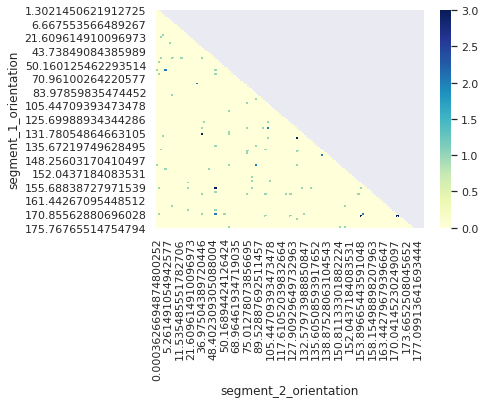

In [87]:
# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_direct_syn, cmap="YlGnBu")

# n_shared_synapses

In [88]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

119

In [89]:
soma_tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346341356241,66dc6420ca132a85ddda25939f084caa,0.00565237,=BLOB=,=BLOB=,=BLOB=,0.0202752,0.0178552,0.0200274,0.107137,0.001,0.957373658926309
3,1,648518346341356256,73dbecb8885beae030be3c263406f897,0.025249,=BLOB=,=BLOB=,=BLOB=,0.0679271,0.063242,0.0669904,0.0551834,0.001,1.7858262119801065
3,1,648518346341359123,8e54b140337daf69dfda4e9fbe14ae7f,0.0297197,=BLOB=,=BLOB=,=BLOB=,0.141441,0.122979,0.139556,0.117201,0.001,3.708831526488791
3,1,648518346341361981,f0c077c6b3ec8074c419a09fbb23388b,0.00287949,=BLOB=,=BLOB=,=BLOB=,0.0234285,0.0217913,0.0229093,0.0477177,0.001,1.4644267171718275
3,1,648518346341362771,a7d6d9bb9c79de84f8792c46b1516c16,0.047481,=BLOB=,=BLOB=,=BLOB=,0.681801,0.587579,0.668815,0.119148,0.001,0.6869009007690088
3,1,648518346341369370,8e4dd43ab0a7846e5013ecc6025e9acc,0.0193596,=BLOB=,=BLOB=,=BLOB=,0.234322,0.210452,0.230954,0.087497,0.001,0.5961253447331519
3,1,648518346341379312,8f3db7b9d61c1c8458fe115a339c7b86,0.000641483,=BLOB=,=BLOB=,=BLOB=,0.0427635,0.0370261,0.0422116,0.12126,0.001,0.5843029464358273
3,1,648518346341380208,74e215bae05c675a123732aa45a53b69,0.00306518,=BLOB=,=BLOB=,=BLOB=,0.0916323,0.0823298,0.0903508,0.0875341,0.001,0.5335169346113676
3,1,648518346341385331,96d93eb2895fe58e287a514e0f83940d,0.00550576,=BLOB=,=BLOB=,=BLOB=,0.10177,0.0808544,0.100497,0.193006,0.001,0.6286509538088302
3,1,648518346341389643,b09b0148ef83ed2d83aa1983c6c919bb,0.00926537,=BLOB=,=BLOB=,=BLOB=,0.046643,0.0414749,0.0460076,0.0971797,0.001,1.3243637575452651


In [90]:
n_seg_shared = pinky_fc.SharedInput() & soma_tuned_segments & soma_tuned_segments.proj(segment_b="segment_id")
n_seg_shared

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b segment id unique within each Segmentation,n_syn_a number of synapses for cell A,n_syn_b number of synapses for cell B,n_syn_union number of unique synapses for both,n_syn_shared number of shared synapses,n_seg_a number of segments for cell A,n_seg_b number of segments for cell B,n_seg_union number of unique segments for both,n_seg_shared number of shared segments
3,648518346341356241,648518346341356256,8,1027,1035,0,6,918,924,0
3,648518346341356241,648518346341359123,8,289,297,0,6,270,276,0
3,648518346341356241,648518346341361981,8,760,768,0,6,690,696,0
3,648518346341356241,648518346341362771,8,34,42,0,6,32,38,0
3,648518346341356241,648518346341369370,8,159,167,0,6,144,150,0
3,648518346341356241,648518346341379312,8,117,125,0,6,106,112,0
3,648518346341356241,648518346341380208,8,176,184,0,6,155,161,0
3,648518346341356241,648518346341385331,8,179,187,0,6,167,173,0
3,648518346341356241,648518346341389643,8,4,12,0,6,4,10,0
3,648518346341356241,648518346341394813,8,153,161,0,6,135,141,0


In [91]:
#get the number of shared segments
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, n_shared_segments = n_seg_shared.fetch("segment_id","segment_b","n_seg_shared")

In [92]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [93]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

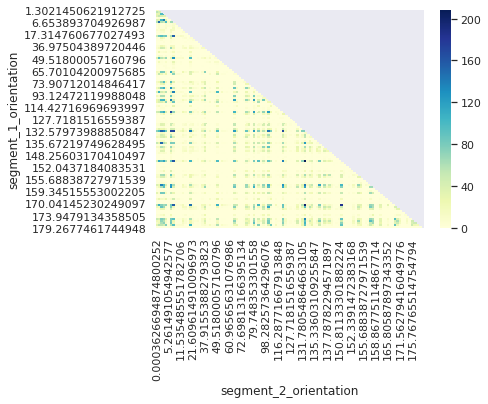

In [94]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_shared_segments = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    n_shared_segments=n_shared_segments,
                   )

df_shared_segments = pd.DataFrame.from_dict(data_shared_segments)
df_shared_segments = df_shared_segments.pivot("segment_1_orientation","segment_2_orientation","n_shared_segments") 
df_shared_segments

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_shared_segments, cmap="YlGnBu")


# synapse density

In [95]:
# find the orientation order based on the preferences
seg_ids,thetas,amps = (soma_tuned_segments).fetch("segment_id","thetas","amps")
#build the lookup dictionary
ori_dict_1 = dict([(seg_id,th[0]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[0]<th[1]])
ori_dict_2 = dict([(seg_id,th[1]*180/np.pi) for seg_id,th in zip(seg_ids,thetas) if th[1]<=th[0]])
ori_dict_2.update(ori_dict_1)
len(ori_dict_2)

119

In [96]:
soma_tuned_segments

segmentation segmentation id,vonbestfit_method method index,segment_id segment id unique within each Segmentation,von_hash unique hash for combination of sta analysis methods,base von mises baseline amplitude,thetas von mises gaussian peak angle (descending amp order),amps von mises gaussian amplitudes (descending amp order),sharps von mises gaussian sharpness (descending amp order),flat_pred predictive performance of flat mean,von_pred predictive performance of von fit on unshuffled data,shuff_pred predictive performance of von fit on shuffled data,von_pred_adv von mises predictive advantage over shuffled data,von_p_value fit component p_value by reshuffle,confidence confidence value that neuron is good match
3,1,648518346341356241,66dc6420ca132a85ddda25939f084caa,0.00565237,=BLOB=,=BLOB=,=BLOB=,0.0202752,0.0178552,0.0200274,0.107137,0.001,0.957373658926309
3,1,648518346341356256,73dbecb8885beae030be3c263406f897,0.025249,=BLOB=,=BLOB=,=BLOB=,0.0679271,0.063242,0.0669904,0.0551834,0.001,1.7858262119801065
3,1,648518346341359123,8e54b140337daf69dfda4e9fbe14ae7f,0.0297197,=BLOB=,=BLOB=,=BLOB=,0.141441,0.122979,0.139556,0.117201,0.001,3.708831526488791
3,1,648518346341361981,f0c077c6b3ec8074c419a09fbb23388b,0.00287949,=BLOB=,=BLOB=,=BLOB=,0.0234285,0.0217913,0.0229093,0.0477177,0.001,1.4644267171718275
3,1,648518346341362771,a7d6d9bb9c79de84f8792c46b1516c16,0.047481,=BLOB=,=BLOB=,=BLOB=,0.681801,0.587579,0.668815,0.119148,0.001,0.6869009007690088
3,1,648518346341369370,8e4dd43ab0a7846e5013ecc6025e9acc,0.0193596,=BLOB=,=BLOB=,=BLOB=,0.234322,0.210452,0.230954,0.087497,0.001,0.5961253447331519
3,1,648518346341379312,8f3db7b9d61c1c8458fe115a339c7b86,0.000641483,=BLOB=,=BLOB=,=BLOB=,0.0427635,0.0370261,0.0422116,0.12126,0.001,0.5843029464358273
3,1,648518346341380208,74e215bae05c675a123732aa45a53b69,0.00306518,=BLOB=,=BLOB=,=BLOB=,0.0916323,0.0823298,0.0903508,0.0875341,0.001,0.5335169346113676
3,1,648518346341385331,96d93eb2895fe58e287a514e0f83940d,0.00550576,=BLOB=,=BLOB=,=BLOB=,0.10177,0.0808544,0.100497,0.193006,0.001,0.6286509538088302
3,1,648518346341389643,b09b0148ef83ed2d83aa1983c6c919bb,0.00926537,=BLOB=,=BLOB=,=BLOB=,0.046643,0.0414749,0.0460076,0.0971797,0.001,1.3243637575452651


In [97]:
pinky_fc.ContactCorrelation()

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b id of the postsynaptic neuron,n_seg_a n_presyns contacting onto segment_id,n_seg_b n_presyns contacting onto segment_b,n_seg_shared n_presyns contacting onto both segment_id and segment_b,n_seg_union n_presyns contacting either segment_id or segment_b,n_seg_shared_converted n_presyns contacting onto both and converting on at least 1 postsyn,n_seg_a_converted n_presyns contacting onto both and converting on postsyna a,n_seg_a_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna a,n_seg_b_converted n_presyns contacting onto both and converting on postsyna b,n_seg_b_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna b,binary_conversion_pearson pearson correlation for binary n_synapse/n_contact rate,binary_conversion_cosine cosine similarity correlation for binary n_synapse/n_contact rate,binary_conv_jaccard_ones_ratio a / (a + b + c + d) for jaccard similarity of binary conversion rate,binary_conv_jaccard_matching_ratio ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate,conversion_pearson Pearson correlation for n_synapse/n_contact rate,conversion_cosine cosine similarity for n_synapse/n_contact rate,density_pearson Pearson correlation for n_synapse/postsyn_length rate,density_cosine cosine similarity for n_synapse/postsyn_length rate,synapse_volume_mean_pearson Pearson correlation for mean of synaptic volume,synapse_volume_mean_cosine cosine similarity for mean of synaptic volume,synapse_vol_density_pearson Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate,synapse_vol_density_cosine cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate,binary_conversion_pearson_converted pearson correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conversion_cosine_converted cosine similarity correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conv_jaccard_ones_ratio_converted a / (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,binary_conv_jaccard_matching_ratio_converted ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,conversion_pearson_converted Pearson correlation for n_synapse/n_contact rate for axon group with at least 1 conversion,conversion_cosine_converted cosine similarity for n_synapse/n_contact rate for axon group with at least 1 conversion,density_pearson_converted Pearson correlation for n_synapse/postsyn_length rate for axon group with at least 1 conversion,density_cosine_converted cosine similarity for n_synapse/postsyn_length rate for axon group with at least 1 conversion,synapse_volume_mean_pearson_converted Pearson correlation for mean of synaptic volume for axon group with at least 1 conversion,synapse_volume_mean_cosine_converted cosine similarity for mean of synaptic volume for axon group with at least 1 conversion,synapse_vol_density_pearson_converted Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion,synapse_vol_density_cosine_converted cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion
3,648518346341353058,648518346341353574,1387,197,0,1584,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341353607,1387,1123,27,2483,0,0,nan,0,nan,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341353788,1387,5,0,1392,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,648518346341353058,648518346341354313,1387,42,0,1429,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,n

In [98]:
binary_conversion_pearson = pinky_fc.ContactCorrelation() & soma_tuned_segments & soma_tuned_segments.proj(segment_b="segment_id")
binary_conversion_pearson_table = binary_conversion_pearson

In [99]:
#get the number of shared segments
# pull down the segment pairs and number of direct connections
#Step 2: pulling down the filtered segments and the number of synapses
seg_1, seg_2, binary_conversion_pearson,conversion_pearson,density_pearson,synapse_vol_density_pearson = binary_conversion_pearson_table.fetch("segment_id",
                                                                                "segment_b",
                                                                                "binary_conversion_pearson",
                                                                                "conversion_pearson",
                                                                                "density_pearson",
                                                                                "synapse_vol_density_pearson"
                                                                               )

In [100]:
#build the parallel array
orientation_seg_1 = np.array([ori_dict_2[k] for k in seg_1])
orientation_seg_2 = np.array([ori_dict_2[k] for k in seg_2])

In [101]:
#rearrange the orientation order so will give a lower triangle
orientation_seg_1_rearranged = []
orientation_seg_2_rearranged = []

for o1,o2 in zip(orientation_seg_1,orientation_seg_2):
    if o1 > o2:
        orientation_seg_1_rearranged.append(o1)
        orientation_seg_2_rearranged.append(o2)
    else:
        orientation_seg_1_rearranged.append(o2)
        orientation_seg_2_rearranged.append(o1)

        
orientation_seg_1_rearranged = np.array(orientation_seg_1_rearranged)
orientation_seg_2_rearranged = np.array(orientation_seg_2_rearranged)

n_direct_syn.dtype
n_direct_syn  = n_direct_syn.astype("int")
n_direct_syn.dtype

dtype('int64')

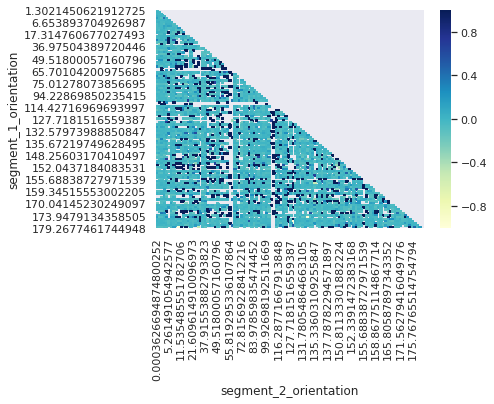

In [102]:
#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_binary_conversion_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    binary_conversion_pearson=binary_conversion_pearson,
                   )

df_binary_conversion_pearson = pd.DataFrame.from_dict(data_binary_conversion_pearson)
df_binary_conversion_pearson = df_binary_conversion_pearson.pivot("segment_1_orientation","segment_2_orientation","binary_conversion_pearson") 
df_binary_conversion_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_binary_conversion_pearson, cmap="YlGnBu")


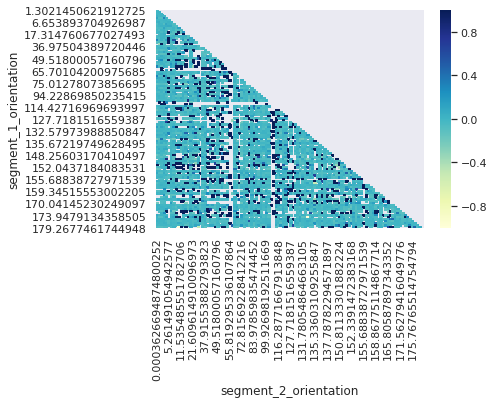

In [103]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_conversion_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    conversion_pearson=conversion_pearson,
                   )

df_data_conversion_pearson = pd.DataFrame.from_dict(data_conversion_pearson)
df_data_conversion_pearson = df_data_conversion_pearson.pivot("segment_1_orientation","segment_2_orientation","conversion_pearson") 
df_data_conversion_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_data_conversion_pearson, cmap="YlGnBu")


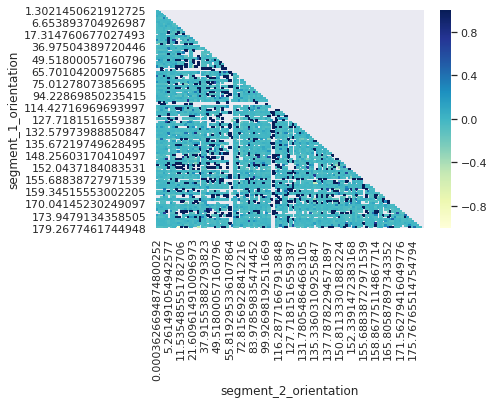

In [104]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_density_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    density_pearson=density_pearson,
                   )

df_density_pearson = pd.DataFrame.from_dict(data_density_pearson)
df_density_pearson = df_density_pearson.pivot("segment_1_orientation","segment_2_orientation","density_pearson") 
df_density_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_density_pearson, cmap="YlGnBu")


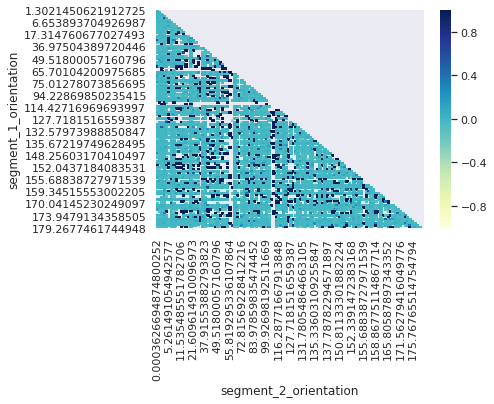

In [105]:
#conversion_pearson,density_pearson,synapse_vol_density_pearson

#actually plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
data_synapse_vol_density_pearson = dict(segment_1_orientation=orientation_seg_1_rearranged,
                   segment_2_orientation=orientation_seg_2_rearranged,
                    synapse_vol_density_pearson=synapse_vol_density_pearson,
                   )

df_synapse_vol_density_pearson = pd.DataFrame.from_dict(data_synapse_vol_density_pearson)
df_synapse_vol_density_pearson = df_synapse_vol_density_pearson.pivot("segment_1_orientation","segment_2_orientation","synapse_vol_density_pearson") 
df_synapse_vol_density_pearson

# get the number of shared segments between the pairs
#sns.heatmap(df_direct_syn)
sns.heatmap(df_synapse_vol_density_pearson, cmap="YlGnBu")
